<a href="https://colab.research.google.com/github/DeisyData/IA_AlgoritmosGeneticos/blob/main/Explorador_AG_MaxFuncion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librarias


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

1. Problema

Maximizar una función



In [ ]:
# Función objetivo
def fx(x):
  return(2000+math.sin(x)*(x**2))

Generar el vector de x

In [ ]:
x = np.arange(0,32,0.01)
y = []

for i in x:
  y.append(fx(i))

Text(0.5, 1.0, 'Función Objetivo')

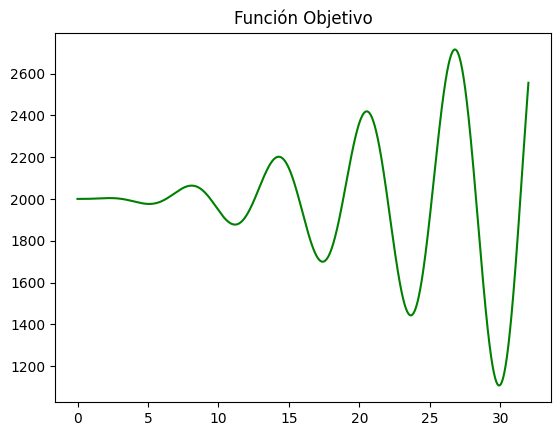

In [ ]:
plt.plot(x,y, "g")
plt.title("Función Objetivo")

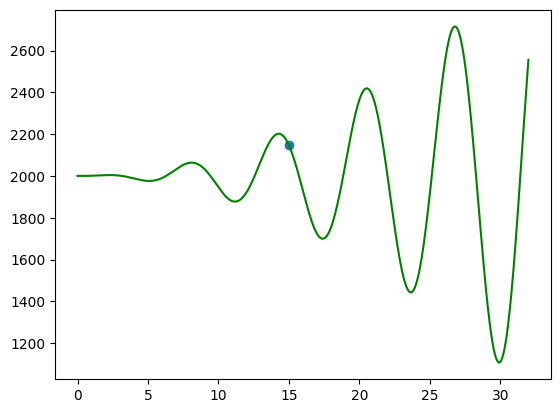

In [ ]:
x_p = 15
y_p =fx(x_p)
plt.plot(x_p,y_p, 'o')
plt.plot(x,y, "g")

In [ ]:
np.max(y_p)

2146.3147640353513

**ALGORITMO GENÉTICO - CODIFICACIÓN**

In [ ]:
# DECODICAR: De lista a decimal
def listToDecimal (num):
  decimal = 0
  for i in range(len(num)):
    decimal+=num[i]*10**(-i)
  return decimal

In [ ]:
# CODIFICAR: Generar el cromosoma de cada individuo
size_cromo = 15
cromosoma = [np.linspace(0,31,32),np.linspace(0,9,10)]
individuo = []
individuo += [np.random.choice(cromosoma[0])]
individuo += list(np.random.choice(cromosoma[1],size_cromo-1))
individuo

[16.0, 4.0, 8.0, 4.0, 6.0, 5.0, 4.0, 1.0, 3.0, 9.0, 2.0, 0.0, 6.0, 4.0, 8.0]

In [ ]:
listToDecimal(individuo)

16.484654139206484

**ALGORITMO GENÉTICO - POBLACIÓN**

In [ ]:
# Población
size_poblacion = 10
poblacion = []

for i in range(size_poblacion):
  individuo = []
  individuo += [np.random.choice(cromosoma[0])]# Antes de la coma
  individuo += list(np.random.choice(cromosoma[1],size_cromo-1)) # después de la coma
  poblacion.append(individuo) # Concatenando individuos ingresar un nuevo elemento al verctor población

poblacion

[[12.0, 4.0, 1.0, 6.0, 6.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 8.0, 4.0, 7.0, 0.0],
 [31.0, 7.0, 9.0, 8.0, 5.0, 7.0, 2.0, 7.0, 0.0, 9.0, 8.0, 6.0, 6.0, 3.0, 6.0],
 [9.0, 6.0, 6.0, 7.0, 4.0, 9.0, 3.0, 8.0, 2.0, 4.0, 7.0, 3.0, 5.0, 0.0, 8.0],
 [13.0, 6.0, 7.0, 4.0, 6.0, 9.0, 6.0, 9.0, 7.0, 4.0, 5.0, 2.0, 5.0, 6.0, 6.0],
 [19.0, 2.0, 9.0, 0.0, 6.0, 7.0, 1.0, 3.0, 3.0, 2.0, 7.0, 9.0, 7.0, 4.0, 2.0],
 [8.0, 8.0, 8.0, 2.0, 7.0, 0.0, 5.0, 2.0, 9.0, 1.0, 5.0, 7.0, 3.0, 7.0, 4.0],
 [13.0, 6.0, 6.0, 5.0, 6.0, 1.0, 1.0, 8.0, 3.0, 3.0, 0.0, 5.0, 2.0, 7.0, 0.0],
 [7.0, 1.0, 1.0, 2.0, 1.0, 9.0, 6.0, 4.0, 3.0, 8.0, 2.0, 6.0, 7.0, 3.0, 7.0],
 [31.0, 2.0, 5.0, 5.0, 9.0, 5.0, 4.0, 6.0, 0.0, 8.0, 4.0, 4.0, 5.0, 3.0, 5.0],
 [28.0, 9.0, 7.0, 2.0, 5.0, 7.0, 3.0, 0.0, 1.0, 8.0, 8.0, 9.0, 1.0, 7.0, 0.0]]

**ALGORITMO GENÉTICO - EVALUAR POBLACIÓN**

In [ ]:
fitness = []

for individuo in poblacion:
  x_d = listToDecimal(individuo)
  y_d = fx(x_d)
  fitness += [y_d]
  #plt.plot(x_d,y_d,'o')

#plt.plot(x,y, "g")
#plt.title("Evaluación de la población en la Función Objetivo")
#plt.xlabel("X")
#plt.ylabel("f(x)")


In [ ]:
# Medición de aptitud de la población
fitness = np.array(fitness)
fitness = fitness/fitness.sum()
fitness

array([0.09783517, 0.1176567 , 0.09786192, 0.1072553 , 0.10683597,
       0.10098795, 0.1072065 , 0.10081903, 0.09127255, 0.0722689 ])

**ALGORITMO GENÉTICO - SELECCIONAR**

**Metodo de selección: Ruleta.** Se selecciona al más apto y el segundo se selcciona aleatorio.

In [ ]:
# El más apto por función fitness
padre_1 = np.argmax(fitness)
# Seleccionando el alatorio por random pero con las probabilidades dadas por la función fitness
padre_2 = np.random.choice(size_poblacion, 1, p=fitness)
padres = [padre_1, padre_2[0]]


**Metodo de selección: Elitista.** Selecciona  siempre los dos mejores padres.


In [ ]:
# Lee las posiciones de los dos valores máximos de la función fitneess
padres = np.argsort(fitness)[::-1][:2]
padres

array([9, 6])

**ALGORITMO GENÉTICO - CRUCE**

**Metodo de Cruce: Punto Simple** En este ejemplo, vamos a cruzar en la mitad de los cromosomas


In [ ]:
poblacion_temporal=[]
# Definir el punto de cruce
cross_point = int(size_cromo/2)
numero_hijos = 5 # en cada iteracion me genera dos hijos
for i in range(numero_hijos):
  padres = np.argsort(fitness)[::-1][:2]
  poblacion_temporal += [poblacion[padres[0]][:cross_point]+poblacion[padres[1]][cross_point:]]
  poblacion_temporal += [poblacion[padres[1]][:cross_point]+poblacion[padres[0]][cross_point:]]

In [ ]:
poblacion_temporal

[[31.0, 7.0, 9.0, 8.0, 5.0, 7.0, 2.0, 9.0, 7.0, 4.0, 5.0, 2.0, 5.0, 6.0, 6.0],
 [13.0, 6.0, 7.0, 4.0, 6.0, 9.0, 6.0, 7.0, 0.0, 9.0, 8.0, 6.0, 6.0, 3.0, 6.0],
 [31.0, 7.0, 9.0, 8.0, 5.0, 7.0, 2.0, 9.0, 7.0, 4.0, 5.0, 2.0, 5.0, 6.0, 6.0],
 [13.0, 6.0, 7.0, 4.0, 6.0, 9.0, 6.0, 7.0, 0.0, 9.0, 8.0, 6.0, 6.0, 3.0, 6.0],
 [31.0, 7.0, 9.0, 8.0, 5.0, 7.0, 2.0, 9.0, 7.0, 4.0, 5.0, 2.0, 5.0, 6.0, 6.0],
 [13.0, 6.0, 7.0, 4.0, 6.0, 9.0, 6.0, 7.0, 0.0, 9.0, 8.0, 6.0, 6.0, 3.0, 6.0],
 [31.0, 7.0, 9.0, 8.0, 5.0, 7.0, 2.0, 9.0, 7.0, 4.0, 5.0, 2.0, 5.0, 6.0, 6.0],
 [13.0, 6.0, 7.0, 4.0, 6.0, 9.0, 6.0, 7.0, 0.0, 9.0, 8.0, 6.0, 6.0, 3.0, 6.0],
 [31.0, 7.0, 9.0, 8.0, 5.0, 7.0, 2.0, 9.0, 7.0, 4.0, 5.0, 2.0, 5.0, 6.0, 6.0],
 [13.0, 6.0, 7.0, 4.0, 6.0, 9.0, 6.0, 7.0, 0.0, 9.0, 8.0, 6.0, 6.0, 3.0, 6.0]]

In [ ]:
poblacion_temporal=[]
# Definir el punto de cruce
cross_point = int(size_cromo/2)
numero_hijos = 5 # en cada iteracion me genera dos hijos
for i in range(numero_hijos):
  # El más apto por función fitness
  padre_1 = np.argmax(fitness)
  # Seleccionando el alatorio por random pero con las probabilidades dadas por la función fitness
  padre_2 = np.random.choice(size_poblacion, 1, p=fitness)
  padres = [padre_1, padre_2[0]]
  poblacion_temporal += [poblacion[padres[0]][:cross_point]+poblacion[padres[1]][cross_point:]]
  poblacion_temporal += [poblacion[padres[1]][:cross_point]+poblacion[padres[0]][cross_point:]]

In [ ]:
poblacion_temporal

[[31.0, 7.0, 9.0, 8.0, 5.0, 7.0, 2.0, 2.0, 9.0, 1.0, 5.0, 7.0, 3.0, 7.0, 4.0],
 [8.0, 8.0, 8.0, 2.0, 7.0, 0.0, 5.0, 7.0, 0.0, 9.0, 8.0, 6.0, 6.0, 3.0, 6.0],
 [31.0, 7.0, 9.0, 8.0, 5.0, 7.0, 2.0, 3.0, 3.0, 2.0, 7.0, 9.0, 7.0, 4.0, 2.0],
 [19.0, 2.0, 9.0, 0.0, 6.0, 7.0, 1.0, 7.0, 0.0, 9.0, 8.0, 6.0, 6.0, 3.0, 6.0],
 [31.0, 7.0, 9.0, 8.0, 5.0, 7.0, 2.0, 9.0, 7.0, 4.0, 5.0, 2.0, 5.0, 6.0, 6.0],
 [13.0, 6.0, 7.0, 4.0, 6.0, 9.0, 6.0, 7.0, 0.0, 9.0, 8.0, 6.0, 6.0, 3.0, 6.0],
 [31.0, 7.0, 9.0, 8.0, 5.0, 7.0, 2.0, 9.0, 7.0, 4.0, 5.0, 2.0, 5.0, 6.0, 6.0],
 [13.0, 6.0, 7.0, 4.0, 6.0, 9.0, 6.0, 7.0, 0.0, 9.0, 8.0, 6.0, 6.0, 3.0, 6.0],
 [31.0, 7.0, 9.0, 8.0, 5.0, 7.0, 2.0, 6.0, 0.0, 8.0, 4.0, 4.0, 5.0, 3.0, 5.0],
 [31.0, 2.0, 5.0, 5.0, 9.0, 5.0, 4.0, 7.0, 0.0, 9.0, 8.0, 6.0, 6.0, 3.0, 6.0]]

**ALGORITMO GENÉTICO - MUTACIÓN**

In [ ]:
def mutate(individuals, prob, pool):
    for i in range(len(individuals)):
        mutate_individual=individuals[i]

        if np.random.random() < prob:
            mutation = np.random.choice(pool[0])
            mutate_individual = [mutation] + mutate_individual[1:]

        for j in range(1,len(mutate_individual)):
            if np.random.random() < prob:
                mutation = np.random.choice(pool[1])
                mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:]
        individuals[i] = mutate_individual

In [ ]:
mutate(poblacion_temporal, 0.05, cromosoma)
poblacion_temporal

[[31.0, 7.0, 9.0, 8.0, 5.0, 7.0, 2.0, 2.0, 9.0, 1.0, 5.0, 7.0, 7.0, 7.0, 4.0],
 [8.0, 8.0, 8.0, 2.0, 7.0, 0.0, 5.0, 7.0, 0.0, 9.0, 8.0, 6.0, 6.0, 3.0, 6.0],
 [31.0, 7.0, 9.0, 8.0, 5.0, 7.0, 2.0, 3.0, 3.0, 2.0, 7.0, 9.0, 7.0, 4.0, 2.0],
 [19.0, 2.0, 9.0, 0.0, 6.0, 7.0, 1.0, 7.0, 0.0, 0.0, 8.0, 6.0, 6.0, 3.0, 6.0],
 [31.0, 7.0, 9.0, 8.0, 5.0, 7.0, 2.0, 9.0, 7.0, 4.0, 5.0, 2.0, 5.0, 6.0, 6.0],
 [30.0, 6.0, 7.0, 4.0, 6.0, 9.0, 6.0, 7.0, 0.0, 9.0, 8.0, 6.0, 6.0, 3.0, 6.0],
 [31.0, 7.0, 9.0, 8.0, 5.0, 7.0, 2.0, 9.0, 7.0, 4.0, 5.0, 2.0, 5.0, 6.0, 4.0],
 [13.0, 6.0, 7.0, 4.0, 6.0, 9.0, 6.0, 7.0, 0.0, 9.0, 8.0, 6.0, 6.0, 3.0, 6.0],
 [31.0, 7.0, 9.0, 8.0, 5.0, 7.0, 2.0, 6.0, 0.0, 8.0, 4.0, 4.0, 5.0, 3.0, 5.0],
 [27.0, 2.0, 7.0, 5.0, 9.0, 5.0, 4.0, 9.0, 0.0, 9.0, 5.0, 6.0, 6.0, 3.0, 6.0]]

**ALGORITMO GENÉTICO - REEMPLAZO**

**Metodo de Reemplazo** Generación completa

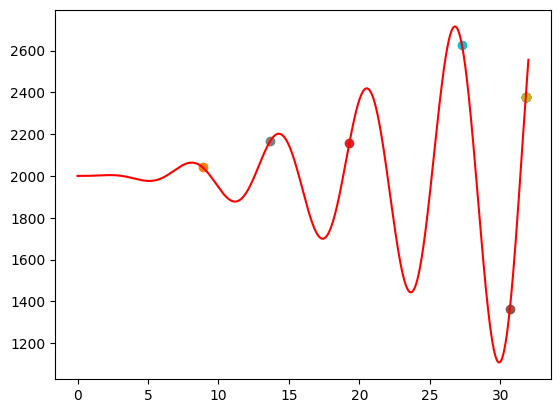

In [ ]:
poblacion = poblacion_temporal

for individuo in poblacion:
  x_d = listToDecimal(individuo)
  y_d = fx(x_d)
  plt.plot(x_d,y_d,'o')

plt.plot(x,y,'r')


In [ ]:
def mutate(individuals, prob, pool):

    for i in range(len(individuals)):
        mutate_individual=individuals[i]

        if np.random.random() < prob:
            mutation = np.random.choice(pool[0])
            mutate_individual = [mutation] + mutate_individual[1:]

        for j in range(1,len(mutate_individual)):
            if np.random.random() < prob:
                mutation = np.random.choice(pool[1])
                mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:]
        individuals[i] = mutate_individual

**ALGORITMO GENÉTICO - COMPLETO - main**

In [ ]:
# Población
size_poblacion = 10
poblacion = []

for i in range(size_poblacion):
  individuo = []
  individuo += [np.random.choice(cromosoma[0])]# Antes de la coma
  individuo += list(np.random.choice(cromosoma[1],size_cromo-1)) # después de la coma
  poblacion.append(individuo) # Concatenando individuos ingresar un nuevo elemento al verctor población

poblacion

[[21.0, 3.0, 0.0, 5.0, 5.0, 8.0, 4.0, 1.0, 6.0, 5.0, 3.0, 8.0, 2.0, 6.0, 1.0],
 [23.0, 0.0, 2.0, 9.0, 8.0, 4.0, 0.0, 0.0, 6.0, 5.0, 3.0, 6.0, 2.0, 6.0, 2.0],
 [11.0, 1.0, 1.0, 7.0, 1.0, 3.0, 8.0, 4.0, 7.0, 7.0, 9.0, 5.0, 1.0, 6.0, 2.0],
 [18.0, 8.0, 9.0, 1.0, 4.0, 6.0, 6.0, 3.0, 7.0, 0.0, 3.0, 6.0, 1.0, 0.0, 6.0],
 [15.0, 0.0, 5.0, 3.0, 3.0, 8.0, 2.0, 7.0, 0.0, 9.0, 1.0, 0.0, 4.0, 2.0, 9.0],
 [8.0, 5.0, 7.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 7.0, 2.0, 4.0, 7.0, 7.0, 2.0],
 [31.0, 8.0, 1.0, 5.0, 5.0, 6.0, 1.0, 7.0, 5.0, 3.0, 9.0, 3.0, 5.0, 5.0, 9.0],
 [28.0, 1.0, 5.0, 8.0, 4.0, 2.0, 0.0, 6.0, 4.0, 6.0, 3.0, 5.0, 0.0, 3.0, 2.0],
 [7.0, 2.0, 3.0, 7.0, 6.0, 5.0, 7.0, 8.0, 0.0, 5.0, 8.0, 0.0, 2.0, 6.0, 0.0],
 [14.0, 4.0, 9.0, 8.0, 4.0, 0.0, 2.0, 3.0, 7.0, 3.0, 5.0, 5.0, 3.0, 3.0, 5.0]]

In [ ]:
generaciones = 1000

for _ in range(generaciones):

# Evaluación de aptitud
  fitness = []
  for individuo in poblacion:
    x_d = listToDecimal(individuo)
    y_d = fx(x_d)
    fitness += [y_d]
  fitness = np.array(fitness)
  fitness = fitness/fitness.sum()

# Selección y Cruce
  poblacion_temporal=[]
  # Definir el punto de cruce
  cross_point = int(size_cromo/2)
  numero_hijos = int(size_poblacion/2) # en cada iteracion me genera dos hijos
  for i in range(numero_hijos):
    padres = np.argsort(fitness)[::-1][:2]
    poblacion_temporal += [poblacion[padres[0]][:cross_point]+poblacion[padres[1]][cross_point:]]
    poblacion_temporal += [poblacion[padres[1]][:cross_point]+poblacion[padres[0]][cross_point:]]

# Mutacion
  mutate(poblacion_temporal, 0.01, cromosoma)

# Reemplazo
  poblacion = poblacion_temporal


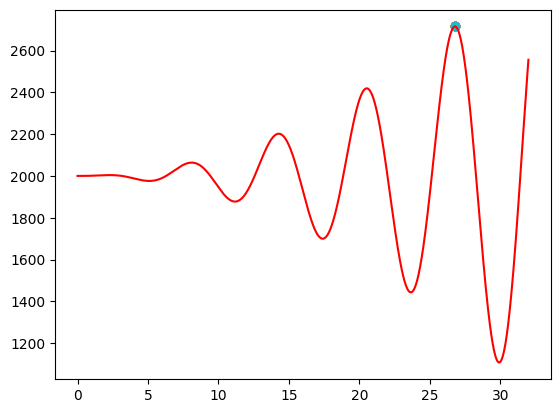

In [ ]:
for individuo in poblacion:
  x_d = listToDecimal(individuo)
  y_d = fx(x_d)
  plt.plot(x_d,y_d,'o')

plt.plot(x,y,'r')